# With "Securities_Account", "Online", "CD_Account", "CreditCard", "Experience" Dropped 

## Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective
To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Importing necessary Packages

In [131]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# To build model for prediction

from sklearn.linear_model import LogisticRegression


# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### QUICK SANITY CHECK: Creating Original Data Set Version to refer back to 

In [132]:
loan = pd.read_csv(
    "https://raw.githubusercontent.com/miricoder/projects/main/Supervised_Learning_Classification/Loan_Modelling.csv"
)

<IPython.core.display.Javascript object>

In [133]:
# Display column and row values using pyton 3's f-string
print(f"There are {loan.shape[0]} rows and {loan.shape[1]} columns in the original loan_data set.")

# Looking at the 10 random sample rows done using np.random
# Because looking at random values will give you better understaning than head or tail values
np.random.seed(1)
loan.sample(5)


There are 5000 rows and 14 columns in the original loan_data set.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0


<IPython.core.display.Javascript object>

In [134]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [135]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [136]:
# Checking for Duplicate  - If there are any duplicates they must be removed by doing....
# .    data.drop_duplicates(inplace=True)
loan[loan.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [137]:
loan.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

<IPython.core.display.Javascript object>

In [138]:
# Note: The describe method for numeric columns doesn't list the number of unique values,
#    since this is usually not particularly meaningful for numeric data
loan.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

In [139]:
loan["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

**Observations -**
* Dataset is properly loaded 
* All 14 Columns Are numerical in nature, target Variable Personal_Loan is already given in Binary Classification 
* There're 4520 Negative values (0's) and 480 Positive Values (1's) in our Data Set  
* There're no null or duplicate values present in the original Data Set 
* All Columns Shows be having unique values in them 
* ID column is very unique so it will be dropped during the Data Clean Up Process
* `Online`:  Median is 1, string indicator that customer usage of online facilities 
* `Mortgage`: Median Mortgage is at 0.0, however we see that less than 75% of Value of house mortgage is at 101K with high standard deviation and seems to have outlier in both ends of the tail
* `CCAvg`: Median spending on credit cards per month is at 1.5
* `Income`: Median Annual income of the customer is at 64K 
* `Age`: Median Customer’s age in completed years is 45 with Median `Experience` level at 20 Years and the Median `Family` size of the customer is at 2

## Data Preparation
###### **Making the second copy of the Loan Data Set for below Alterations to be performed**
* Checking for Unique values in ID column and removing it


In [140]:
# Making a copy of the Data Set
loan_2 = loan.copy()

<IPython.core.display.Javascript object>

In [141]:
# Checking ID unique count
loan_2["ID"].nunique()

5000

<IPython.core.display.Javascript object>

In [142]:
# Removing ID column
loan_2.drop(["ID"], axis=1, inplace=True)  # Dropping the ID column

<IPython.core.display.Javascript object>

# **EDA - Exploratory Data Analysis Sanity Checked Data**
******************************************************************************************

**Reusable Methods**

In [42]:
def hist_box(data, feature, figsize=(10, 5), kde=True, bins=None):
    """
    Boxplot and Histogram combined within the same graph page
    in order to make comparison and analysis more efficient

    data: dataframe
    feature: dataframe column
    figsize: size of the figures (default (10,5))
    kde: whether to show the density curve (values set by user during usage - Boolean)
    bins: number of bins for histogram (default None)"""
    # f2 holds are graph withax_box2 and ax_hist2 params
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [43]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<h2 style="color:Brown">Univariate Analysis</h2>

In [44]:
# #### Univariate Analysis on Numerical data
# # creating histograms
# loan_2.hist(figsize=(14, 14))
# plt.show()

<IPython.core.display.Javascript object>

### `Analyzing Age`

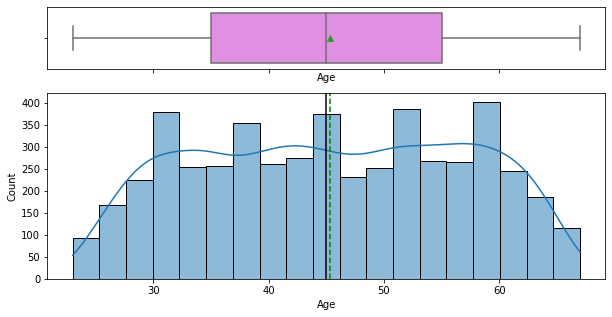

<IPython.core.display.Javascript object>

In [45]:
hist_box(loan_2, "Age")

**Univariate - Observation on Age-**
* No Outliers present, Mean and Median ages are very close

### `Analyzing Experience`

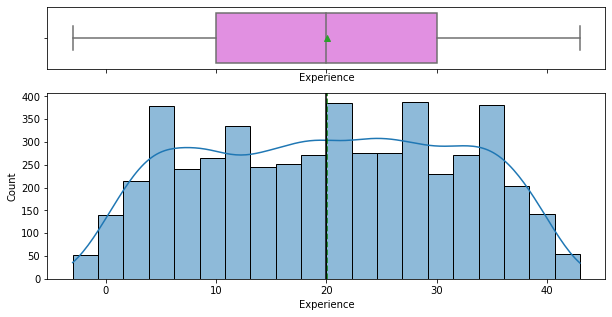

<IPython.core.display.Javascript object>

In [46]:
hist_box(loan_2, "Experience")

**Univariate - Observation on Experience-**
* Median number of professional experience years is 20


### `Analyzing Income`

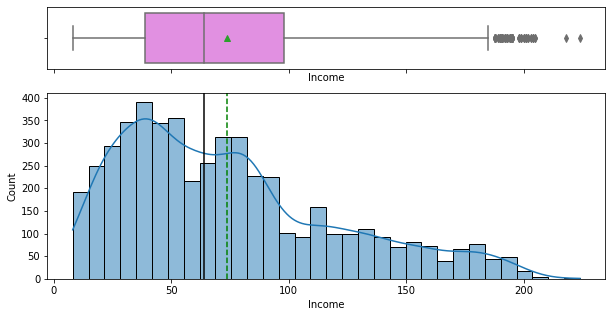

<IPython.core.display.Javascript object>

In [47]:
hist_box(loan_2, "Income")

**Univariate - Observation on Income-**
* Income is right skewed with outliers where mean income is greter than median 
* Less than 50% of our customers have annual income range of approx. 40-60K

### `Analyzing ZIPCode`
* It would be better if we had state wise information rather than zipCode 


Most Frequent ZIPCode:  0    94720
dtype: int64


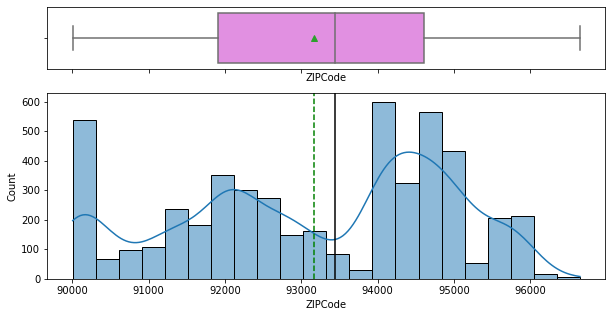

<IPython.core.display.Javascript object>

In [48]:
print("Most Frequent ZIPCode: ", loan_2["ZIPCode"].mode())
hist_box(loan_2, "ZIPCode")

**Univariate - Observation on ZIPCode-**
* Based on the ZipCodes we can see that NewYork and California has the highest amounts of loans 

### `Analyzing Family`

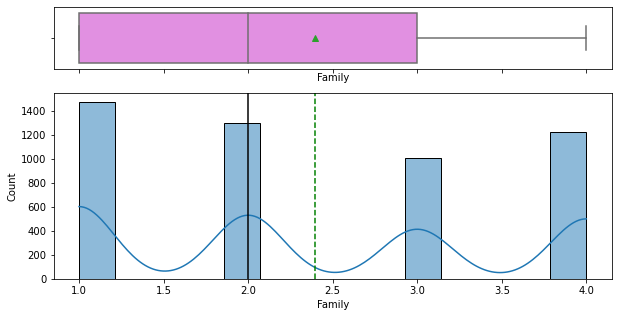

<IPython.core.display.Javascript object>

In [49]:
hist_box(loan_2, "Family")

**Univariate - Observation on Family-**
* Mean Family size of the customer is greater than the median, though less than 50% of customers have family size of almost 2 

### `Analyzing CCAvg:`
 Average spending on credit cards per month (in thousand dollars)

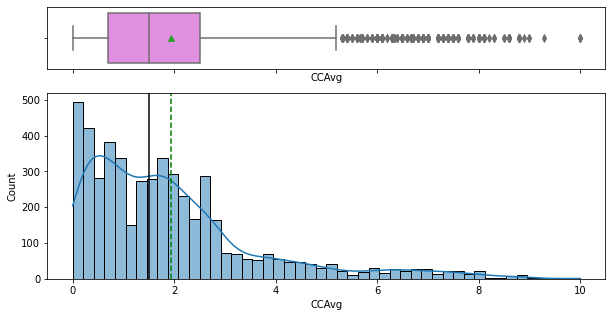

<IPython.core.display.Javascript object>

In [50]:
hist_box(loan_2, "CCAvg")

**Univariate - Observation on CCAvg-**
* There're a lot of customers in less than 25% of the data who spent between 0-5K dollars on credit per month
* Data is right skewed as Mean Average Credit Card Speding is greater than Median

******************************************************************************************

### `Analyzing Education:`
  Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

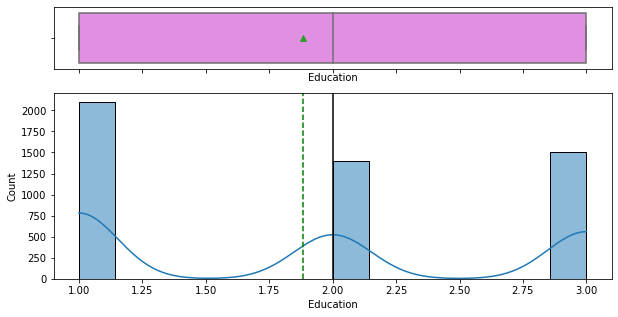

<IPython.core.display.Javascript object>

In [51]:
hist_box(loan_2, "Education")

**Univariate - Observation on Education-**
* Less than 50% of our customers are not graduates

### `Analyzing Mortgage:`
Value of house mortgage if any. (in thousand dollars)

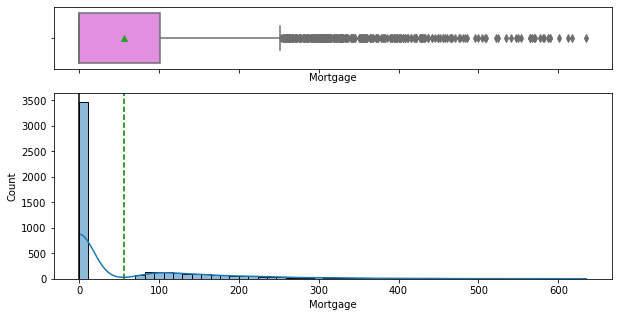

<IPython.core.display.Javascript object>

In [52]:
hist_box(loan_2, "Mortgage")

**Univariate - Observation on Mortgage-**
* Data is heavily skewed to the right

### `Securities_Account`
Does the customer have securities account with the bank?

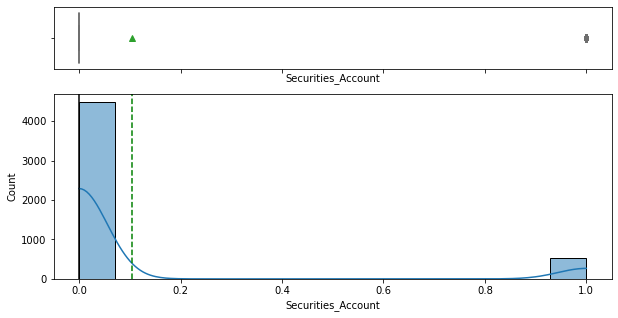

<IPython.core.display.Javascript object>

In [53]:
hist_box(loan_2, "Securities_Account")

**Univariate - Observation on Securities_Account-**
* Data is heavily skewed to the right

### `CD_Account`
 Does the customer have a certificate of deposit (CD) account with the bank?

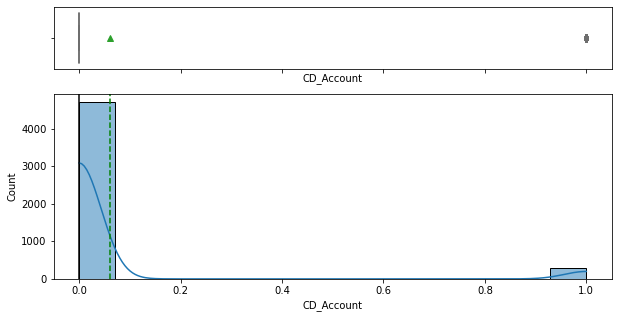

<IPython.core.display.Javascript object>

In [54]:
hist_box(loan_2, "CD_Account")

**Univariate - Observation on CD_Account-**
* Mean of customer having CD account with the bank is around 0.04 and has outliers

### `Online`
 Do customers use internet banking facilities?

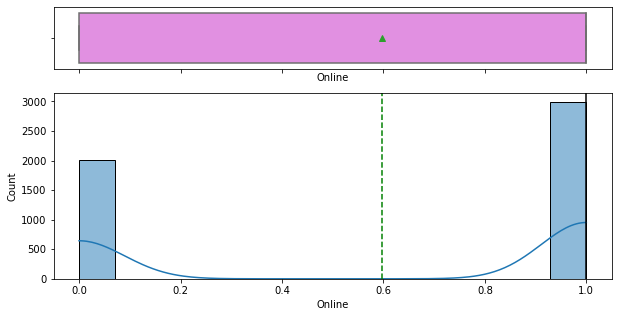

<IPython.core.display.Javascript object>

In [55]:
hist_box(loan_2, "Online")

**Univariate - Observation on Online-**
* Median users of Internet Banking is higher than the mean 

### `CreditCard` 
  Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

0.0


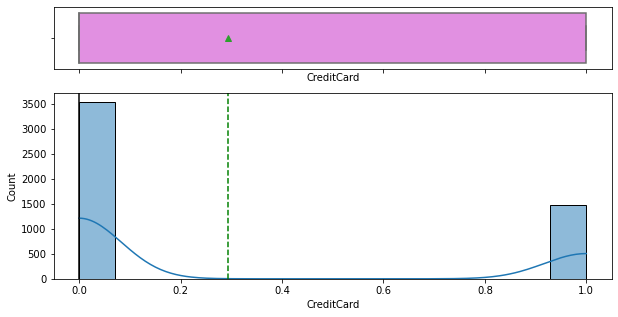

<IPython.core.display.Javascript object>

In [56]:
print(loan_2["CreditCard"].median())
hist_box(loan_2, "CreditCard")

**Univariate - Observation on CreditCard-**
* Median number of customer using credit card issued by another bank is 0 where as mean is 0.294

<h2 style="color:Brown">Bivariate Analysis</h2>

### `Analyzing Age VS Personal_Loan`

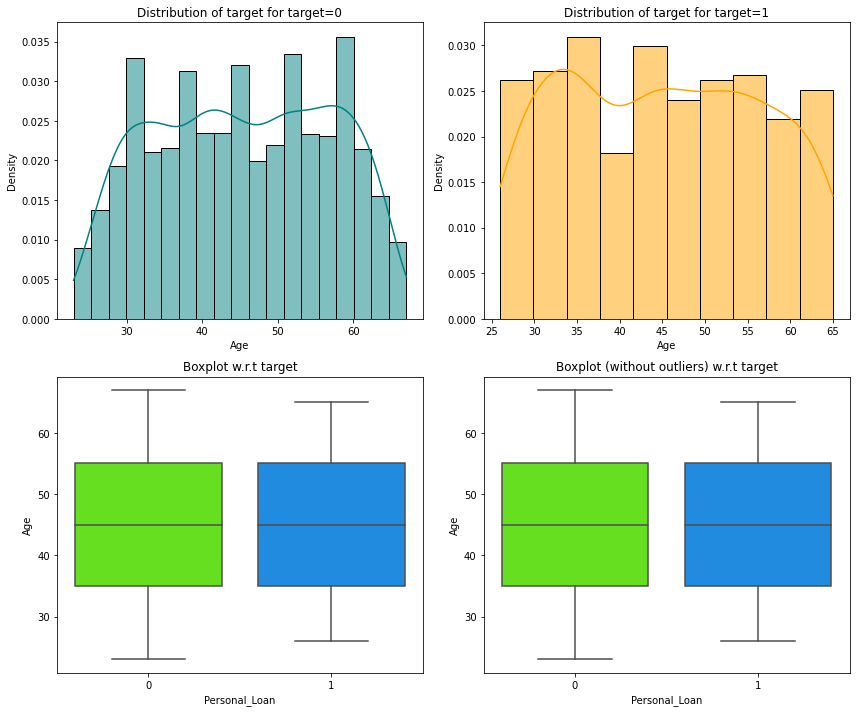

<IPython.core.display.Javascript object>

In [57]:
distribution_plot_wrt_target(loan_2, "Age", "Personal_Loan")

**Bivariate - Observation on Age  vs Personal_Loan-**
* The ages of Customers during previous Personal_Loan compaign are the same between those to who took it and did not take it 

### `Analyzing Experience VS Personal_Loan`

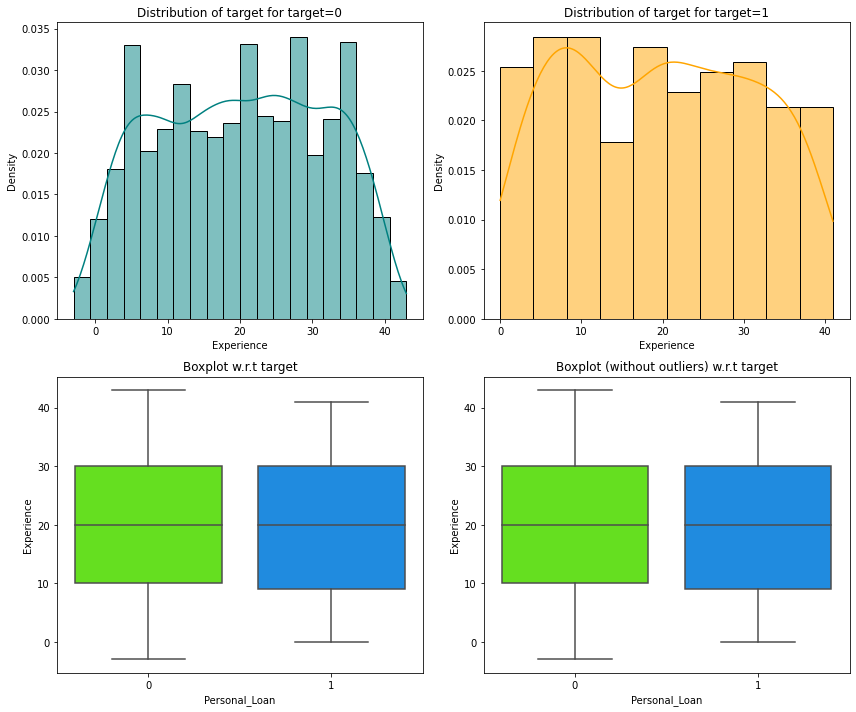

<IPython.core.display.Javascript object>

In [58]:
distribution_plot_wrt_target(loan_2, "Experience", "Personal_Loan")

**Bivariate - Observation on Experience vs Personal_Loan-**
* Professionals with Median Experience of 20 years were the same for the Personal_Loan takers and not takers in the previous campaign


### `Analyzing Income VS Personal_Loan`

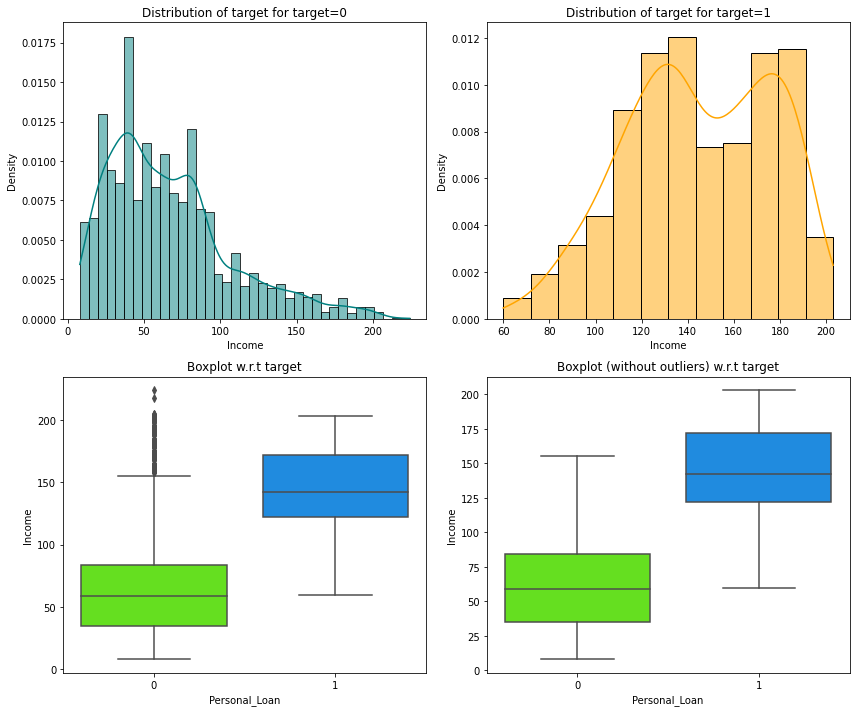

<IPython.core.display.Javascript object>

In [59]:
distribution_plot_wrt_target(loan_2, "Income", "Personal_Loan")

**Bivariate  - Observation on Income vs Personal_Loan-**
* As observed previously and now, there were more people who did not take the personal_loan in the last campaign than those who did 
* Out of all the Personal_Loan takers in the last campaign, customers with median Income of 55K annually took less loans in the last campaign where as customers with median income at approx. 145K annual took more loans

### `Analyzing ZIPCode VS Personal_Loan`

Most Frequent ZipCode:  0    94720
dtype: int64
Median ZipCode:  93437.0


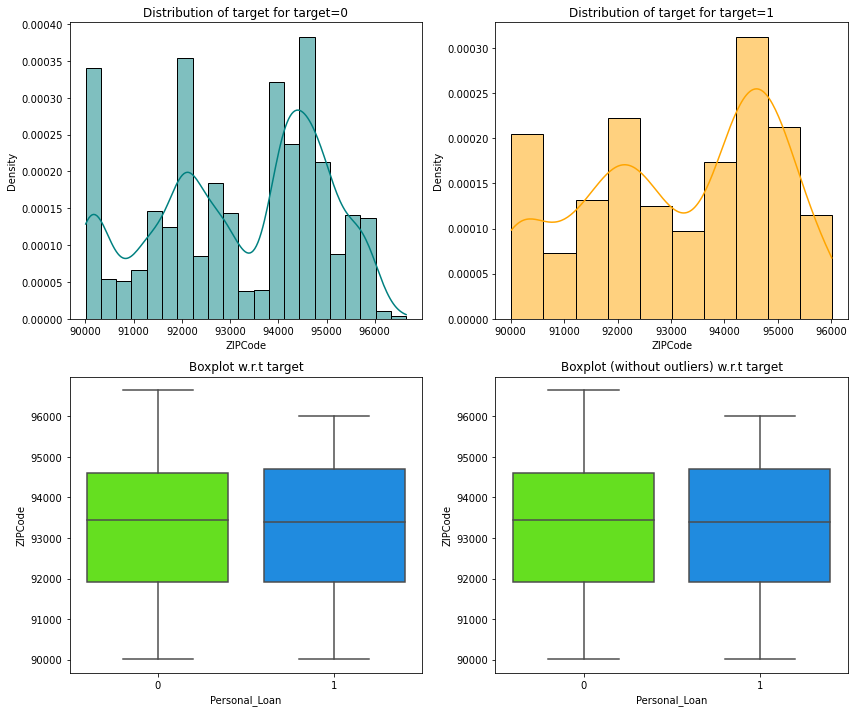

<IPython.core.display.Javascript object>

In [60]:
print("Most Frequent ZipCode: ", loan_2["ZIPCode"].mode())
print("Median ZipCode: ", loan_2["ZIPCode"].median())
distribution_plot_wrt_target(loan_2, "ZIPCode", "Personal_Loan")

**Bivariate  - Observation on ZipCode vs Personal_Loan-**
* Less than 75% of Personal_Loan takers in previous campaign resided in ZipCodes located in NY and CA
* ZIPCode with most Personal Loan Buyers and not Buyer is 94720 in California 
* ZIPCode with median Personal Loan Buyers and not Buyers is 93437 in California 


### `Analyzing Family VS Personal_Loan`

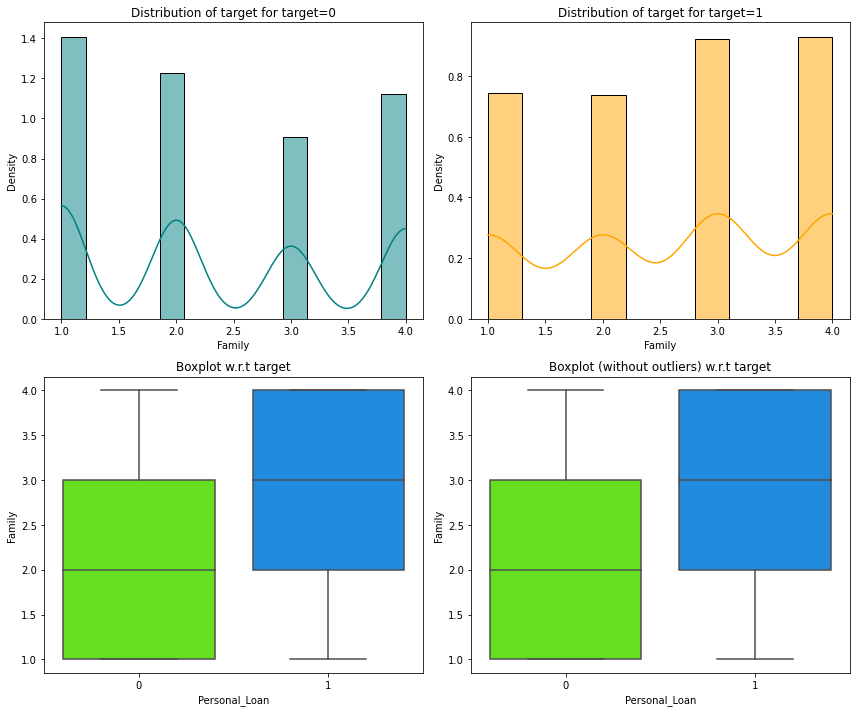

<IPython.core.display.Javascript object>

In [61]:
distribution_plot_wrt_target(loan_2, "Family", "Personal_Loan")

**Bivariate  - Observation on Family vs Personal_Loan-**
* Median family size of the customers who took on the Personal Loan in the last campaign and did not are the same at 3

### `Analyzing CCAvg VS Personal_Loan`
 Average spending on credit cards per month (in thousand dollars)

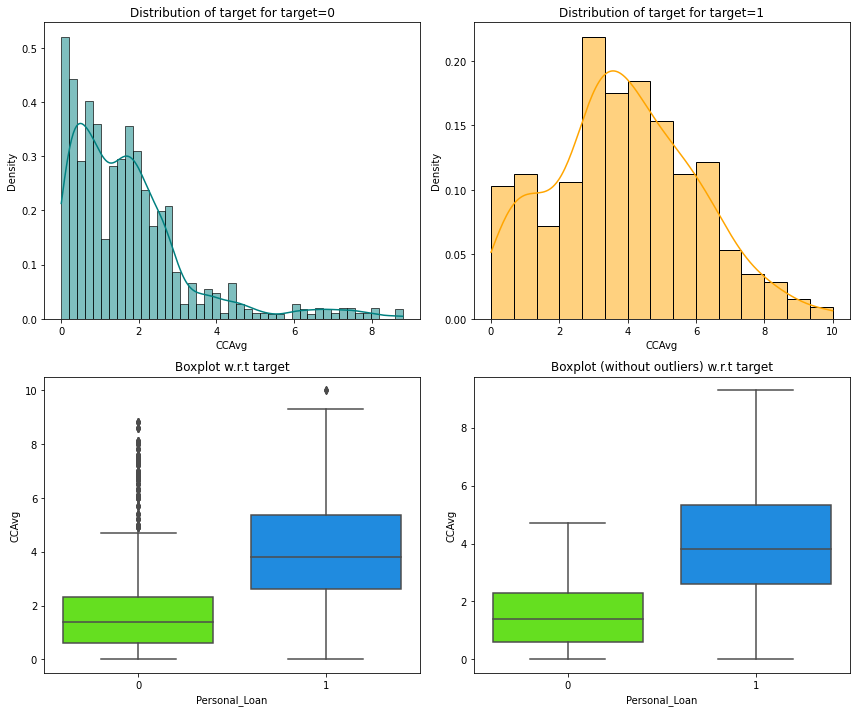

<IPython.core.display.Javascript object>

In [62]:
distribution_plot_wrt_target(loan_2, "CCAvg", "Personal_Loan")

**Bivariate  - Observation on CCAvg vs Personal_Loan-**
* Median Average Credit Card Spending of those who took on the Personl Loan is higher than those who did not take the loan. Which is expected

### `Analyzing Education VS Personal_Loan`
  Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

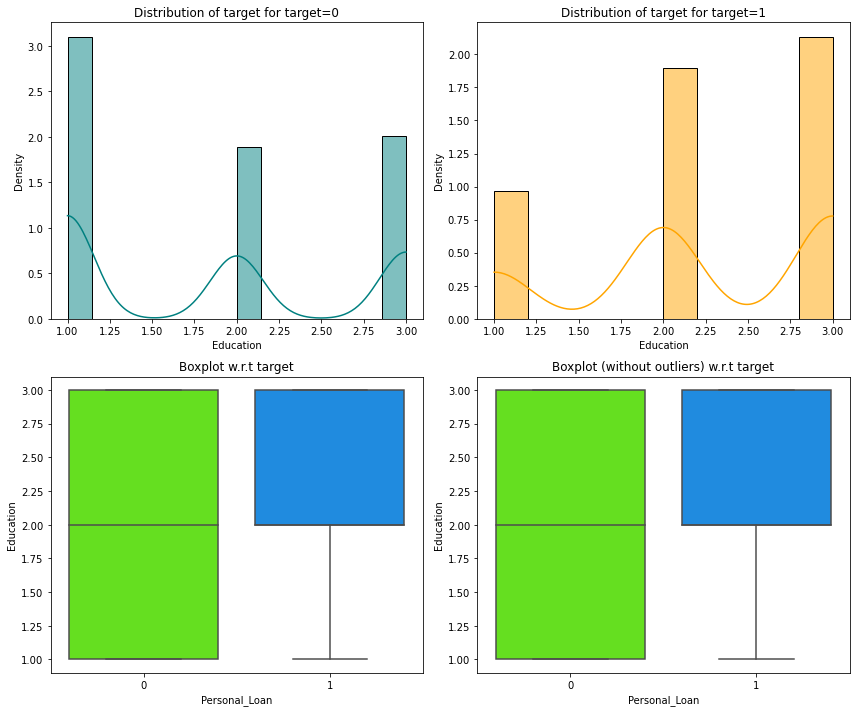

<IPython.core.display.Javascript object>

In [63]:
distribution_plot_wrt_target(loan_2, "Education", "Personal_Loan")

**Bivariate  - Observation on Education vs Personal_Loan-**
* Median Education level of individuals who took on the loan and did not take on the loan was 2, meaning they were graduates 

### `Analyzing Mortgage VS Personal_Loan`
Value of house mortgage if any. (in thousand dollars)

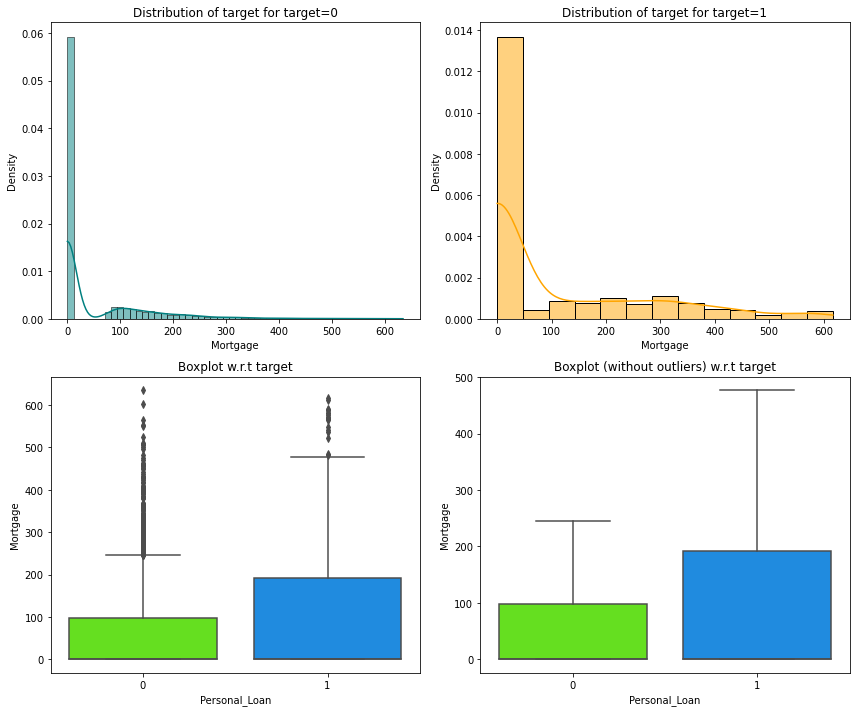

<IPython.core.display.Javascript object>

In [64]:
distribution_plot_wrt_target(loan_2, "Mortgage", "Personal_Loan")

**Bivariate  - Observation on Mortgage vs Personal_Loan-**
* Median Value of house mortgage of those who took on a loan was less than those who did not take on the loan, there're outliers present in both cases though


### `Analyzing  Securities_Account VS Personal_Loan` 
Does the customer have securities account with the bank?

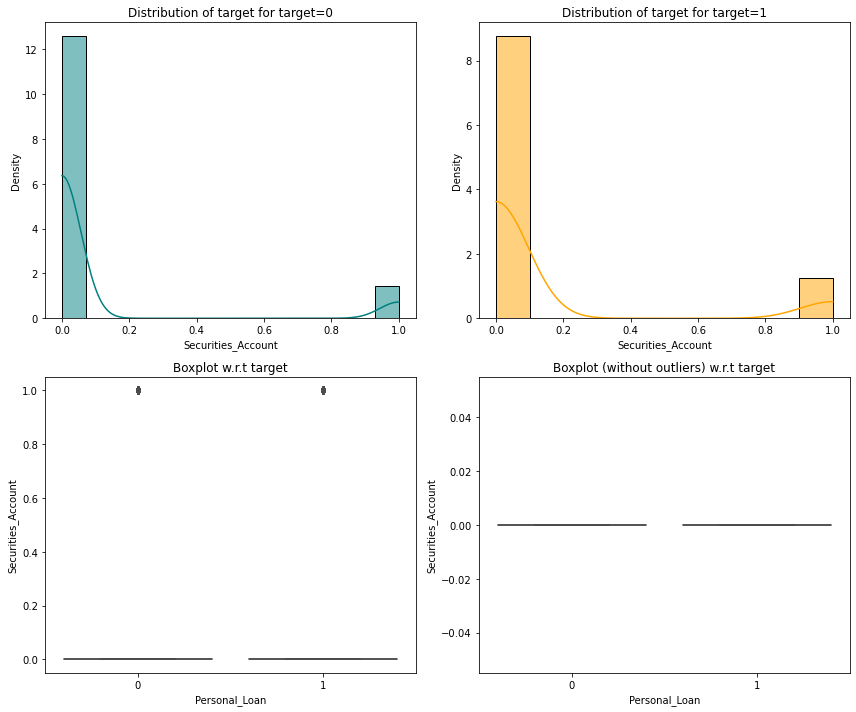

<IPython.core.display.Javascript object>

In [65]:
distribution_plot_wrt_target(loan_2, "Securities_Account", "Personal_Loan")


**Bivariate  - Observation on Securities_Account vs Personal_Loan-**
* Vast majority of the customers did not have securities account with the bank amongst the users who did and did not take on the loan, but there outliers in both cases

### `Analyzing CD_Account VS Personal_Loan`
 Does the customer have a certificate of deposit (CD) account with the bank?

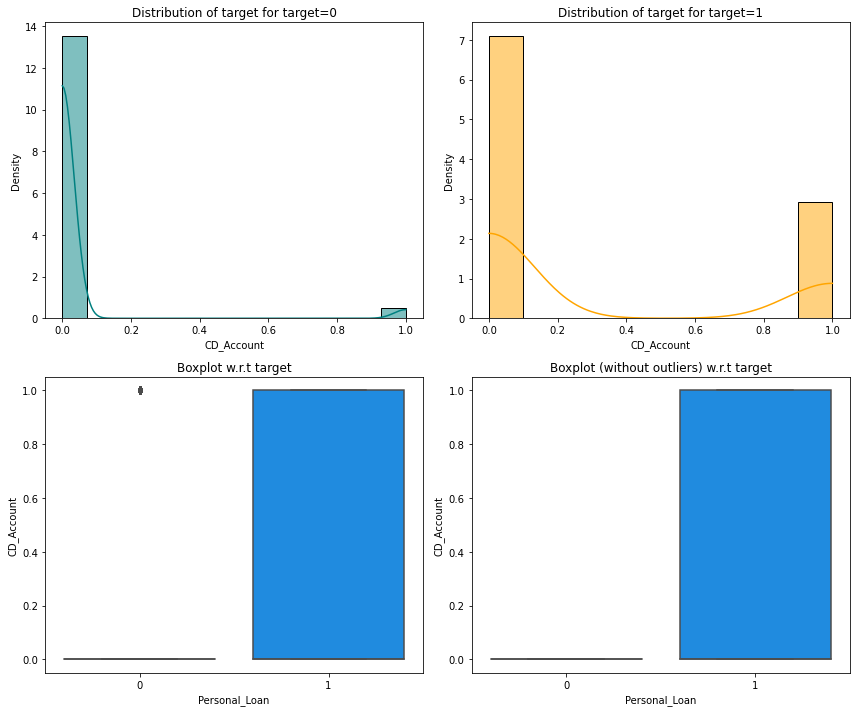

<IPython.core.display.Javascript object>

In [66]:
distribution_plot_wrt_target(loan_2, "CD_Account", "Personal_Loan")

**Bivariate  - Observation on CD_Account vs Personal_Loan-**
* Number of customer who took on the personal loan and had CD account with the bank were greater than those who did not and had a CD account with the Bank

### `Analyzing Online VS  Personal_Loan`
 Does the customer have a certificate of deposit (CD) account with the bank?

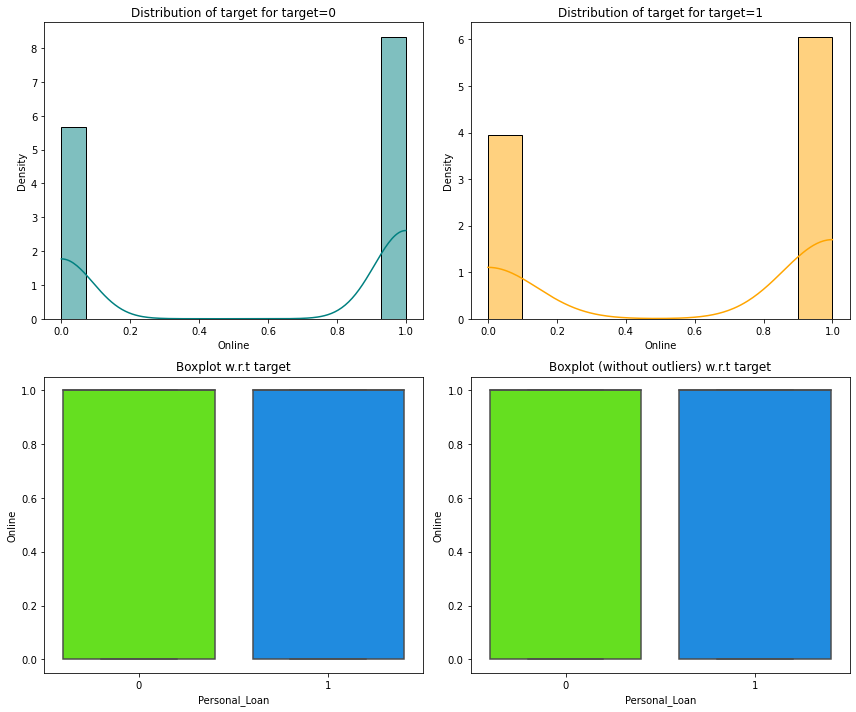

<IPython.core.display.Javascript object>

In [67]:
distribution_plot_wrt_target(loan_2, "Online", "Personal_Loan")

**Bivariate  - Observation on Online vs Personal_Loan-**
* We have equal number of Online users amongst the customers who did and did not take on the loan

### `CreditCard  VS  Personal_Loan ` 
  Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

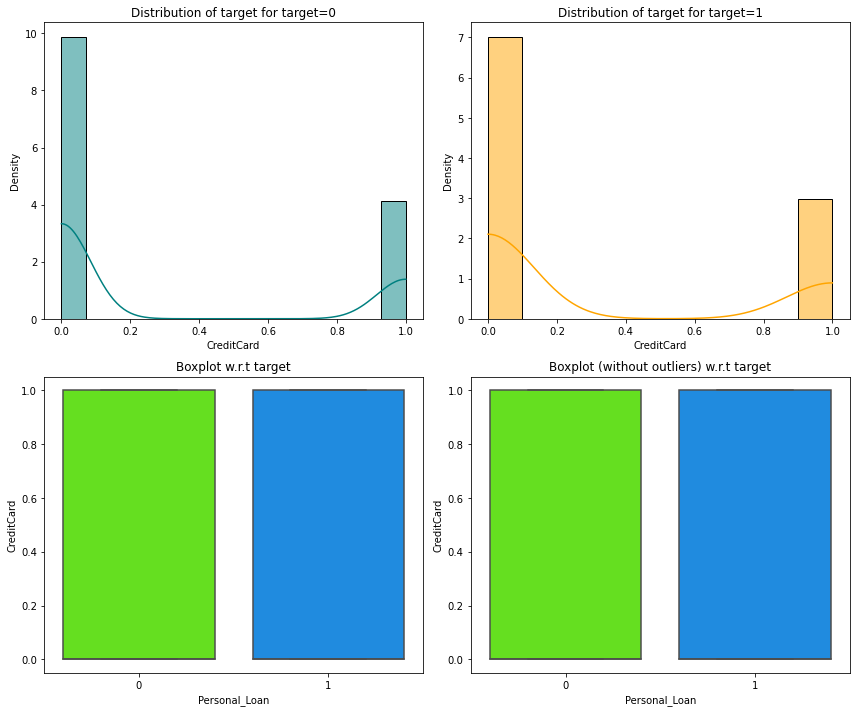

<IPython.core.display.Javascript object>

In [68]:
distribution_plot_wrt_target(loan_2, "CreditCard", "Personal_Loan")

**Bivariate  - Observation on Online vs Personal_Loan-**
* We have equal number of CreditCard users amongst the customers who did and did not take on the loan

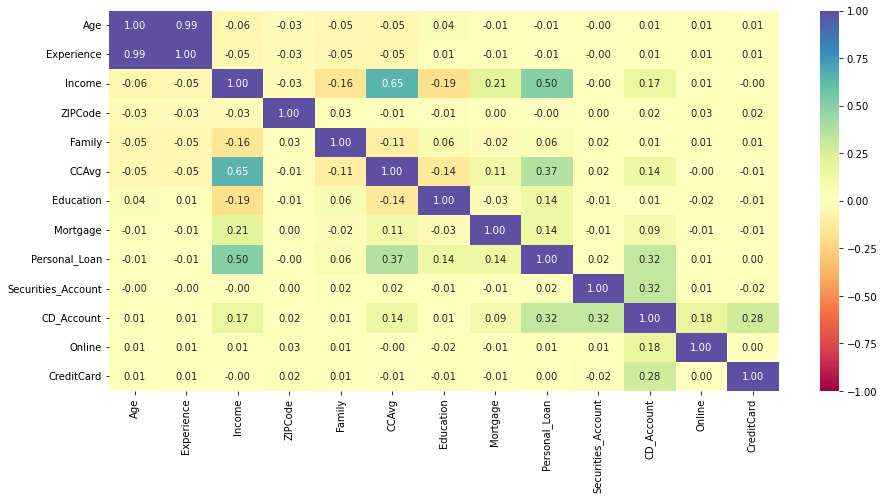

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan_2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Bivariate  - Observation on Data Correlation-**
* There is a strong correlation between `Income` and `CCAvg - Average Spending on Credit Cards Per Month`
* There is a strong correlation between `Income` and `Personal_Loan` also has medium to high correlation


## Reusable Methods During Model Building

In [70]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [71]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# Decistion Tree 


<h3 style="color:Dark">Model Building - Approach</h3>

1. Make a copy of the data used in EDA - loan_2 as loan_mod1
2. Data preparation
3. Partition the data into train and test set.
4. Built a CART model on the train data.
5. Tune the model and prune the tree, if required.
**************************************************************************************************

## Data Preparation
###### **Making the second copy of the Loan Data Set for below Alterations to be performed**
* Checking for Unique values in ID column and removing it

In [72]:
# Copyingt the EDA used Dataset for Safekeeping
loan_mod1 = loan_2.copy()

<IPython.core.display.Javascript object>

In [73]:
# loan_mod1["ID"].nunique()

<IPython.core.display.Javascript object>

In [74]:
# Checking unique ZIPCode Values
# loan_mod1["ZIPCode"].nunique()

<IPython.core.display.Javascript object>

In [75]:
# We can drop the ZIPCode values see its second column with the most unique values
# loan_mod1.drop(["ZIPCode"], axis=1, inplace=True)  # Dropping the ID column

<IPython.core.display.Javascript object>

<h2 style="color:Blue">Split Data</h2>

In [76]:
# Defining Dependent Variablea and Indepedent Variables
X = loan_mod1.drop(["Personal_Loan"], axis=1)
y = loan_mod1["Personal_Loan"]

<IPython.core.display.Javascript object>

In [77]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1
)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [78]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

**`Balanced vs Imbalanced Data(stratify=y)`**

`Previously Prior to Stratify`
Percentage of classes in training set:
* 0 -->   0.905429
* 1 -->   0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
* 0 -->    0.900667
* 1 -->   0.099333
Name: Personal_Loan, dtype: float64

`After Applying Stratify`

class_weight {0: 0.904, 1: 0.096}
Percentage of classes in training set:
* 0 -->   0.904 (same as in Test Data)
* 1 -->   0.096
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
* 0 -->   0.904 (same as in Training Data)
* 1 -->   0.096
Name: Personal_Loan, dtype: float64

<h2 style="color:Blue">Model evaluation criterion</h2>

#### Model can make wrong predictions as:

1. Predicting a liability customer `will buy` a personal loan but in `reality` the liability customer `will NOT Buy` Personal Loan. - Loss of resources

2. Predicting a liability customer `will NOT buy` a personal loan but in `reality` the liability customer `will Buy` Personal Loan. - Loss of opportunity
#### Which case is more important? 
If we predict customer who will take the Personal Loan as a Customer who will not.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

<h2 style="color:Blue">Build Decision Tree Model</h2>

* We will build our model using the DecisionTreeRegressor function since our data is all Numerical including Target Variable. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0: 0.904, 1: 0.096} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [79]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.904, 1: 0.096}, random_state=1
)
# model = DecisionTreeClassifier(random_state=0)
# cross_val_score(model, X, y, cv=10)

<IPython.core.display.Javascript object>

In [80]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.904, 1: 0.096}, random_state=1)

<IPython.core.display.Javascript object>

<h3 style="color:Red">Checking model performance on training set</h3>

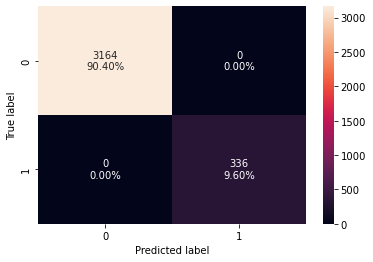

<IPython.core.display.Javascript object>

In [81]:
confusion_matrix_sklearn(model, X_train, y_train)

In [82]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

In [83]:
# decision_tree_perf_train = model_performance_classification_sklearn(
#     model, X_train, y_train
# )
# decision_tree_perf_train

<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

<h3 style="color:Red">Checking model performance on testing set</h3>

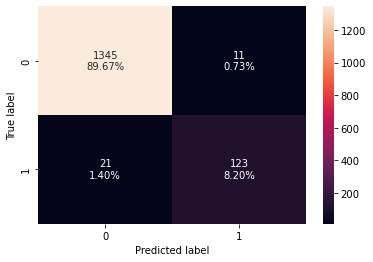

<IPython.core.display.Javascript object>

In [84]:
confusion_matrix_sklearn(model, X_test, y_test)

In [85]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)

print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8541666666666666


<IPython.core.display.Javascript object>

In [86]:
# decision_tree_perf_test = model_performance_classification_sklearn(
#     model, X_test, y_test
# )
# decision_tree_perf_test

<IPython.core.display.Javascript object>

* Recall is 0.85 which is still generalized, there is not a huge difference between Train and Test, but a slight decrease in recall

## Visualizing the Decision Tree

In [87]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

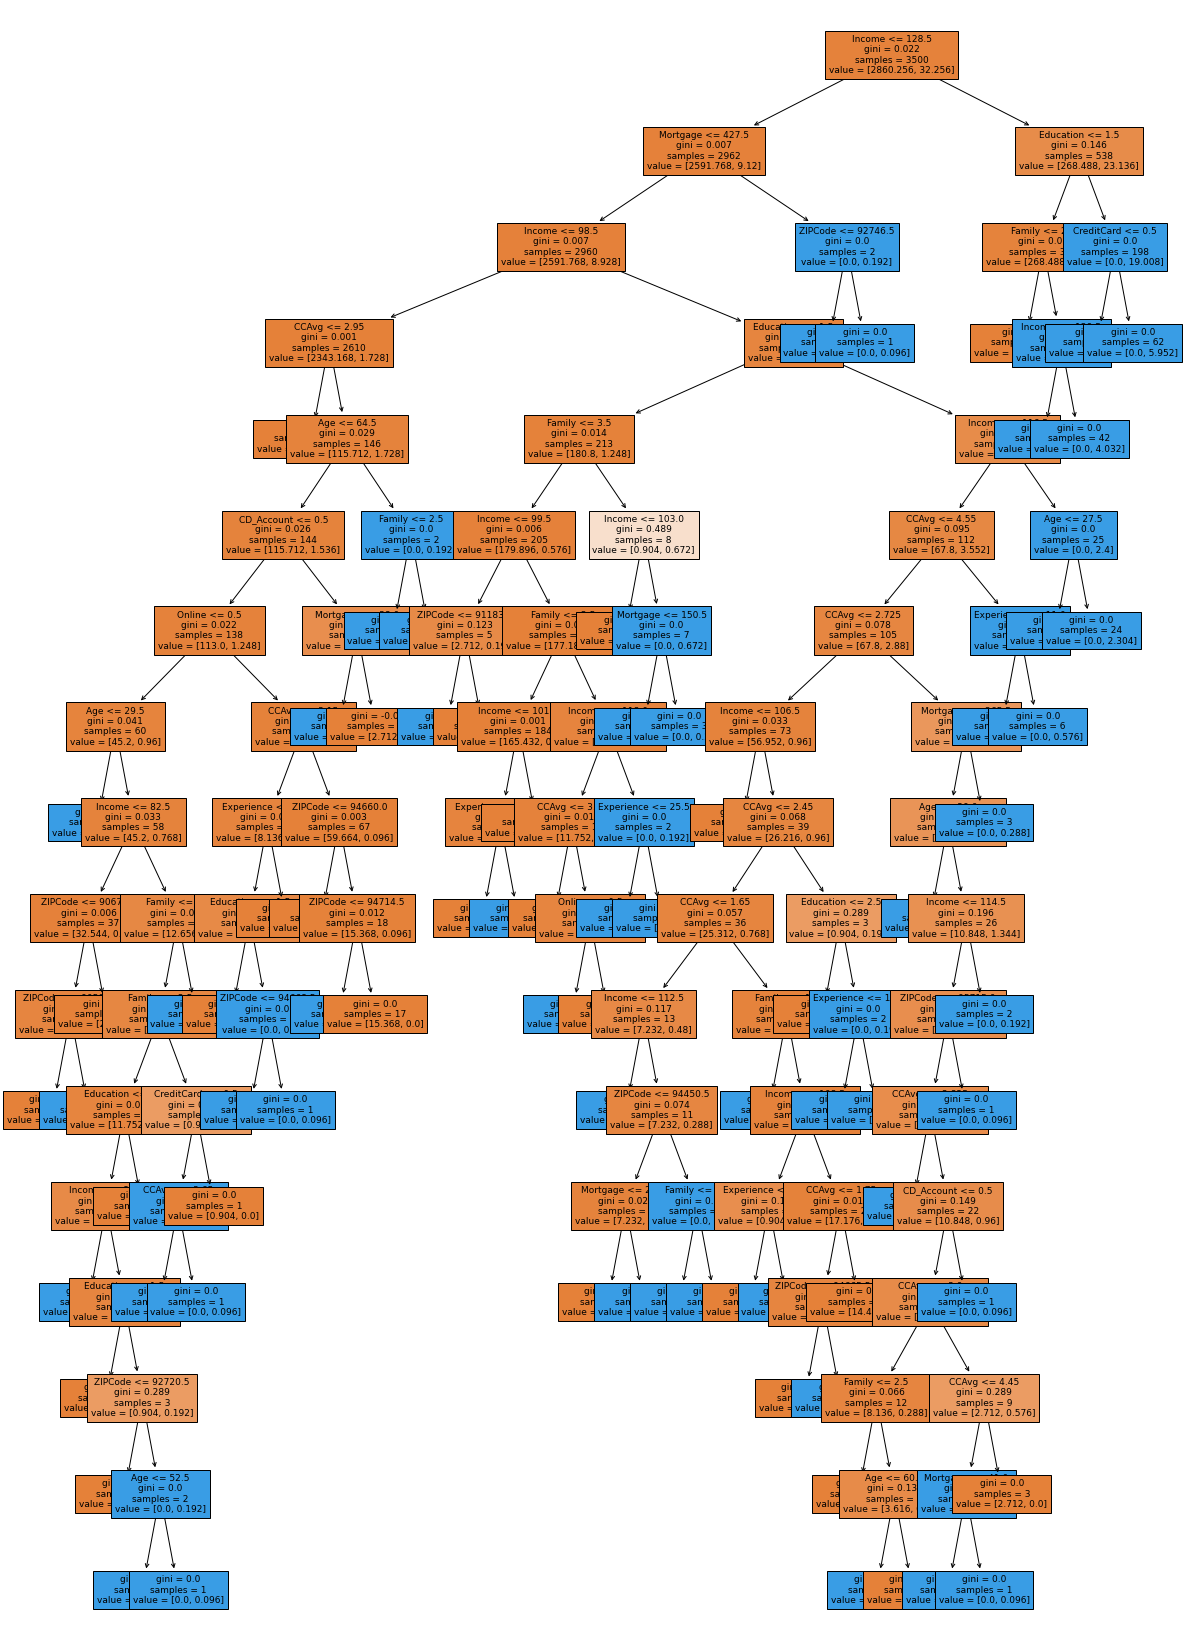

<IPython.core.display.Javascript object>

In [88]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [89]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 128.50
|   |--- Mortgage <= 427.50
|   |   |--- Income <= 98.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [2227.46, 0.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- Age <= 64.50
|   |   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- Age <= 29.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.19] class: 1
|   |   |   |   |   |   |   |--- Age >  29.50
|   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90673.00
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90501.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.71, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode >  90501.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |   |   |   |   |   |--- ZIPCode >  90673.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [29

<IPython.core.display.Javascript object>

* The tree above is very complex and difficult to interpret.

In [90]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.561170
Income              0.153962
Family              0.143096
CCAvg               0.046061
ZIPCode             0.027692
Age                 0.026996
Mortgage            0.023779
Experience          0.005912
CreditCard          0.004965
CD_Account          0.003224
Online              0.003144
Securities_Account  0.000000


<IPython.core.display.Javascript object>

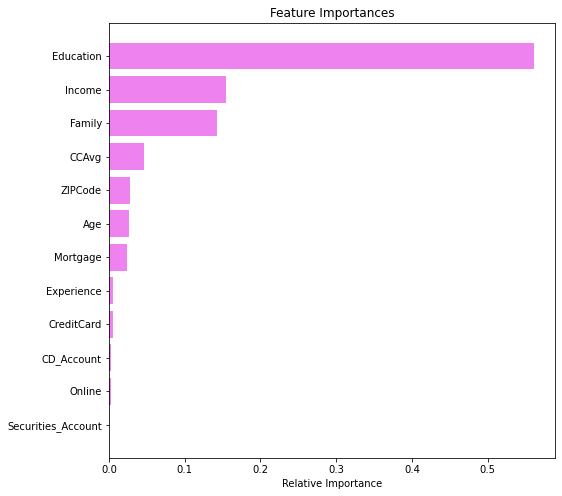

<IPython.core.display.Javascript object>

In [91]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `Education` is the most important variable for predicting whether or not Liability customer will buy Personal Loan, `Income and Family` are almost equally improtant after Education

<h2 style="color:Blue">PrePrunnning - Reducing Over Fitting </h2>

#### Using GridSearch for Hyperparameter tuning of our tree model
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [92]:
# Choose the type of classifier.
# estimator = DecisionTreeRegressor(random_state=0)
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.904, 1: 0.096})
# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.904, 1: 0.096}, criterion='entropy',
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

<h3 style="color:Red">Checking model performance on training set w/class_weight={0: 0.904, 1: 0.096}</h3>

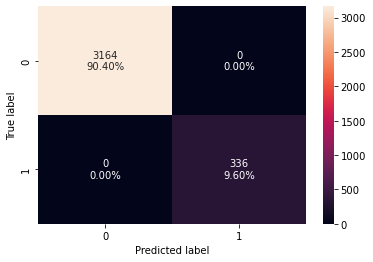

<IPython.core.display.Javascript object>

In [93]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [94]:
# decision_tree_perf_train = model_performance_classification_sklearn(
#     model, X_train, y_train
# )
# decision_tree_perf_train
decision_tree_tune_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_tune_perf_train)


Recall Score: 1.0


<IPython.core.display.Javascript object>

<h3 style="color:Red">Checking model performance on testing set w/class_weight={0: 0.904, 1: 0.096}</h3>

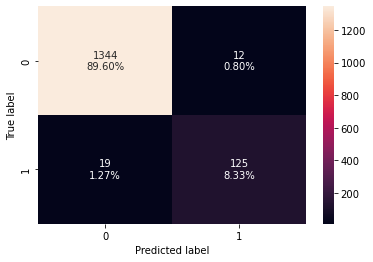

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [96]:
# decision_tree_perf_test = model_performance_classification_sklearn(
#     model, X_test, y_test
# )
# decision_tree_perf_test
decision_tree_tune_perf_test = get_recall_score(model, X_test, y_test)

print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.8541666666666666


<IPython.core.display.Javascript object>

* Recall is still same after HypterParameterization to see if we could improve it

## Visualizing the Decision Tree after Hyperparamaterization

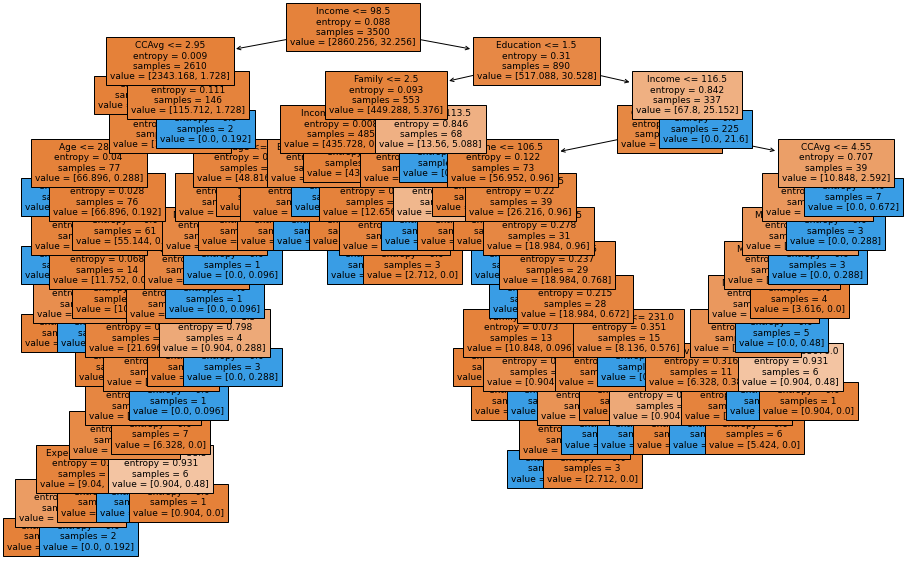

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [98]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2227.46, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Age <= 64.50
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- Age <= 28.00
|   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |--- Age >  28.00
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |   |   |--- CCAvg >  3.25
|   |   |   |   |   |   |   |--- ZIPCode <= 91355.50
|   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |   |   |   |--- ZIPCode >  91355.50
|   |   |   |   |   |   |   |   |--- weights: [10.85, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- weights: [55.14, 

<IPython.core.display.Javascript object>

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a Liability Customer has an Income <= 98.50 with CCAvg(monthly credit spending avg.) <= 2.95 then it will be part of class 0, not buying the loan, but if the customer is 28yrs old with an income less than or equal to 81K he or she will be buying Personal Loan

`Interpretations from other decision rules can be made similarly`

In [99]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.558245
Education           0.198975
Family              0.095150
CCAvg               0.073222
Age                 0.022747
Mortgage            0.019002
Experience          0.016266
ZIPCode             0.006409
Online              0.003721
Securities_Account  0.002734
CreditCard          0.001785
CD_Account          0.001744


<IPython.core.display.Javascript object>

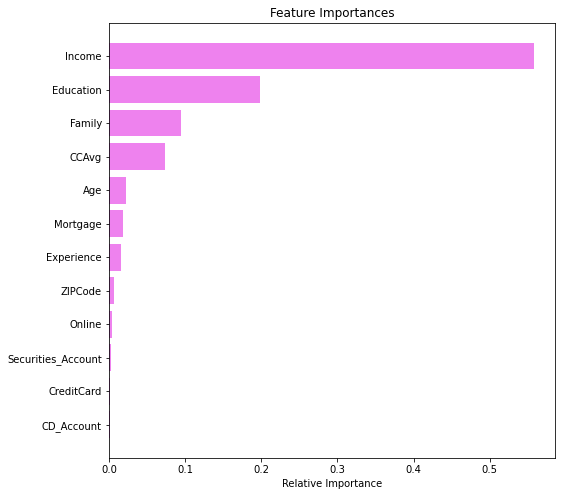

<IPython.core.display.Javascript object>

In [100]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In Tuned Model, `Income` is the most importan variable where as it was Education before, Education is in the second spot, where `Family & CCAvg` are relatibly close to each other in importance

<h2 style="color:Blue">PostPrunning - Reducing Over Fitting</h2>

### Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [101]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.904, 1: 0.096})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [102]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-4.628764e-17
1,3.684735e-20,-4.625080e-17
2,3.684735e-20,-4.621395e-17
3,3.684735e-20,-4.617710e-17
4,1.105421e-19,-4.606656e-17
5,1.105421e-19,-4.595602e-17
6,1.105421e-19,-4.584548e-17
7,3.095178e-19,-4.553596e-17
8,3.611041e-19,-4.517485e-17
9,4.922806e-18,-4.025205e-17


<IPython.core.display.Javascript object>

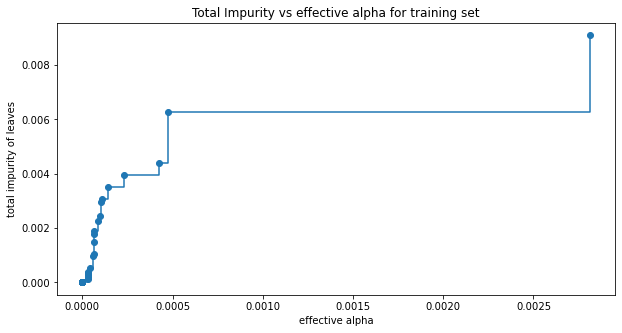

<IPython.core.display.Javascript object>

In [103]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* As the Alpha increases at 0.0026 towards Single Node, the Tree is becoming Simpler and Overgeneralized or Overfitted


### Lets train a decision tree using the effective alphas. The last value in ``ccp_alphas`` is the alpha value that prunes the whole tree, leaving the tree, ``clfs[-1]``, with one node.

In [104]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.904, 1: 0.096}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.006479759343669114


<IPython.core.display.Javascript object>

### For the remainder, we remove the last element in ``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

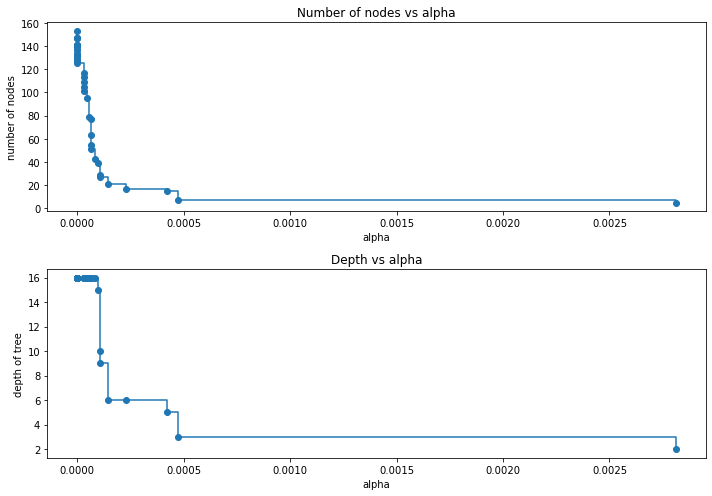

<IPython.core.display.Javascript object>

In [105]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [106]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [107]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [108]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

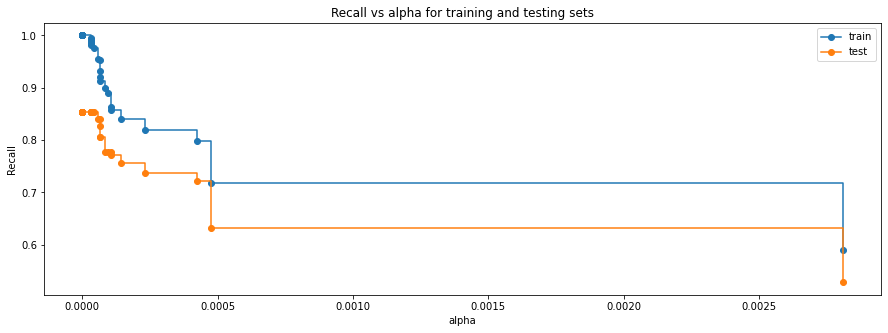

<IPython.core.display.Javascript object>

In [109]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**As our tree becomes simpler down to a single node, our reall reduces below 0.6 . In this circumstance we can see that even after PostPrunning our recall is 1 at ccp_alpha=0**

<h3 style="color:Green">Based on above summary (ccp_alpha=0 --> recall 1) we already know what is the highest train and test recall, but still lets do it programaitcally to see if anything changes</h3>

In [110]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(class_weight={0: 0.904, 1: 0.096}, random_state=1)


<IPython.core.display.Javascript object>

* ccp_alpha value not returned

In [111]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.904, 1: 0.096}, random_state=1)

<IPython.core.display.Javascript object>

* ccp_alpha value not returned

<h3 style="color:Red">Checking best model performance on training set w/class_weight={0: 0.904, 1: 0.096}</h3>

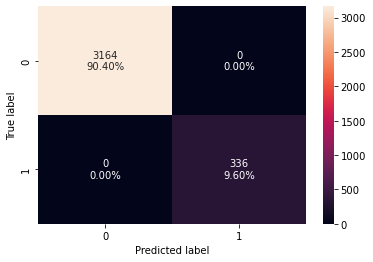

<IPython.core.display.Javascript object>

In [112]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [113]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


<IPython.core.display.Javascript object>

<h3 style="color:Red">Checking best model performance on testing set w/class_weight={0: 0.904, 1: 0.096}</h3>

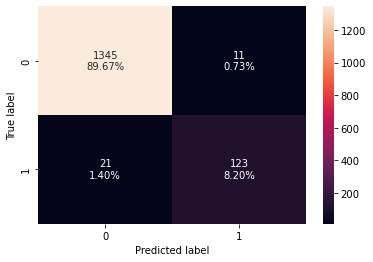

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [115]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.8541666666666666


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree after PostPrunning

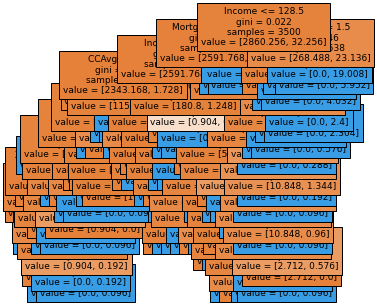

<IPython.core.display.Javascript object>

In [116]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* Model looks complex and bit simplified at the same time, even though its hard to conclude whether its oversimplified or not at this point. 

In [117]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2227.46, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Age <= 64.50
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- Age <= 28.00
|   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |--- Age >  28.00
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |   |   |--- CCAvg >  3.25
|   |   |   |   |   |   |   |--- ZIPCode <= 91355.50
|   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |   |   |   |--- ZIPCode >  91355.50
|   |   |   |   |   |   |   |   |--- weights: [10.85, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- weights: [55.14, 

<IPython.core.display.Javascript object>

**Observations from the tree:**

We can see that not much has changed from previous tree in PrePrunning where below was the case 
 - If a Liability Customer has an Income <= 98.50 with CCAvg(monthly credit spending avg.) <= 2.95 then it will be part of class 0, not buying the loan, but if the customer is 28yrs old with an income less than or equal to 81K he or she will be buying Personal Loan


In [118]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.558245
Education           0.198975
Family              0.095150
CCAvg               0.073222
Age                 0.022747
Mortgage            0.019002
Experience          0.016266
ZIPCode             0.006409
Online              0.003721
Securities_Account  0.002734
CreditCard          0.001785
CD_Account          0.001744


<IPython.core.display.Javascript object>

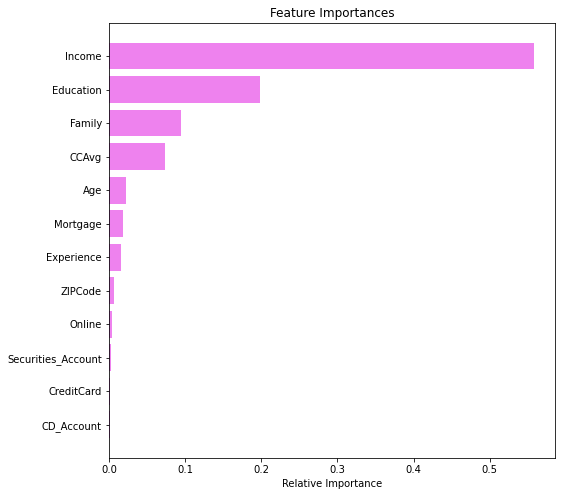

<IPython.core.display.Javascript object>

In [119]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations from the Variable Importance Metrics**

Its also evident from the above Variable Importance Distiburion that creating the model where we get highest train and test recall did not improve the performance of our tree.

<h3 style="color:Green">Further proof of that ccp_alpha produces the best recall is in the below decision tree fit</h3>

In [120]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0, class_weight={0: 0.904, 1: 0.096}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight={0: 0.904, 1: 0.096},
                       random_state=1)

<IPython.core.display.Javascript object>

<h3 style="color:Red">Checking best model performance on training set w/class_weight={0: 0.904, 1: 0.096} & ccp_alpha=0.0</h3>

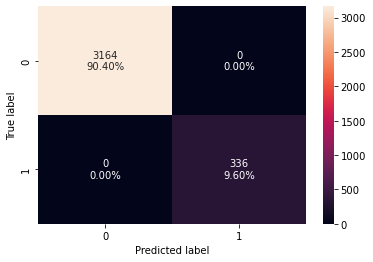

<IPython.core.display.Javascript object>

In [121]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [122]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

<h3 style="color:Red">Checking best model performance on testing set w/class_weight={0: 0.904, 1: 0.096} & ccp_alpha=0.0</h3>

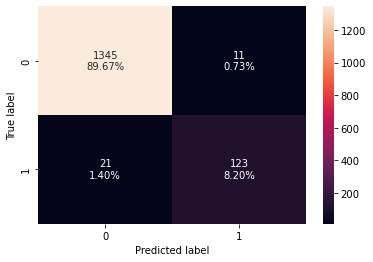

<IPython.core.display.Javascript object>

In [123]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [124]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.8541666666666666


<IPython.core.display.Javascript object>

* Our tree has been performing well generalized with or without PostPrunning, so adding PostPrunning to the picture did not improve Recall beyond 0.85 in test, and it has been consistent in Train at 1 so far

## Visualizing the Decision Tree after tweaking the ccp_alpha

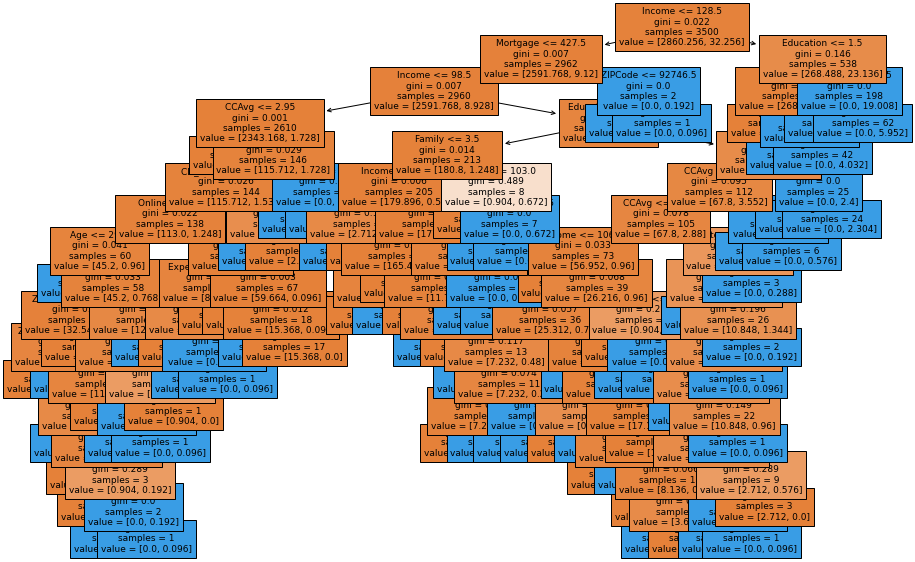

<IPython.core.display.Javascript object>

In [125]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [126]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 128.50
|   |--- Mortgage <= 427.50
|   |   |--- Income <= 98.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [2227.46, 0.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- Age <= 64.50
|   |   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- Age <= 29.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.19] class: 1
|   |   |   |   |   |   |   |--- Age >  29.50
|   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90673.00
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90501.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.71, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode >  90501.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |   |   |   |   |   |--- ZIPCode >  90673.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [29

<IPython.core.display.Javascript object>

In [127]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.561170
Income              0.153962
Family              0.143096
CCAvg               0.046061
ZIPCode             0.027692
Age                 0.026996
Mortgage            0.023779
Experience          0.005912
CreditCard          0.004965
CD_Account          0.003224
Online              0.003144
Securities_Account  0.000000


<IPython.core.display.Javascript object>

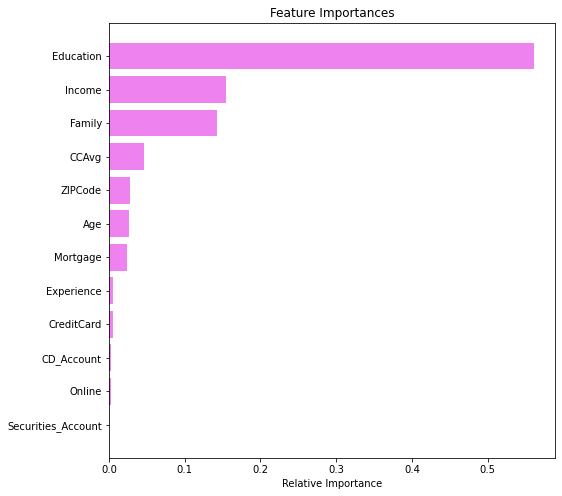

<IPython.core.display.Javascript object>

In [128]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `Education` once again is the most important because we used max alpha of 0 which gives us recall of 1 and where we are not losing any nodes. 

<h2 style="color:Blue">Comparing all the decision tree models</h2>

In [129]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.0
1,1.0
2,1.0


<IPython.core.display.Javascript object>

In [130]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.854167
1,0.854167
2,0.854167


<IPython.core.display.Javascript object>

* Our models original Recall, PrePrunning and PostPrunning Recalls are the same. 

`Original Feature Importance - Order of Importance`
1. Education
2. Income
3. Family


`PrePrunned Feature Importance - Order of Importance`
1. Income
2. Education
3. Family

`PostPrunned Feature Importance - Order of Importance`
1. Education
2. Income
3. Family



# Data PreProcessing 

* Making another copy from loan_2 Data Set 
* Dropping Securities_Account
* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.
**************************************************************************************************

In [192]:
# Will be used in Logistic Regression
loan_lg = loan_2.copy()

<IPython.core.display.Javascript object>

`Given below facts for Education Column`
Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional


In [193]:
# Checking value counts of categorical variables
col = [
    "Age",
    "Experience",
    "Income",
    "ZIPCode",
    "Family",
    "Education",
    "CCAvg",
    "Mortgage",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]
for i in col:
    #     print("Unique values in", i, "are :")
    #     print(f"{loan_lg[i]} {loan_lg[i].value_counts() }")
    col = loan_lg[i]
    print(loan_lg[i], {loan_lg[i].nunique() / loan_lg.shape[0] * 100})
    print("*" * 50)
#     print(f"{loan_lg[i]} {loan_lg[i].value_counts(1)}")
#     print("*" * 50)

0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 5000, dtype: int64 {0.8999999999999999}
**************************************************
0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64 {0.9400000000000001}
**************************************************
0        49
1        34
2        11
3       100
4        45
       ... 
4995     40
4996     15
4997     24
4998     49
4999     83
Name: Income, Length: 5000, dtype: int64 {3.2399999999999998}
**************************************************
0       91107
1       90089
2       94720
3       94112
4       91330
        ...  
4995    92697
4996    92037
4997    93023
4998    90034
4999    92612
Name: ZIPCode, Length: 5000, dtype: int64 {9.34}
**************************************************
0       4
1       3
2       1
3 

<IPython.core.display.Javascript object>

In [194]:
uniqueValues_Age = loan_lg["Age"].nunique() / loan_lg.shape[0] * 100
print(f"Age: {uniqueValues_Age} '%' \n")
uniqueValues_Experience = loan_lg["Experience"].nunique() / loan_lg.shape[0] * 100
print(f"Experience: {uniqueValues_Experience} '%'\n")
uniqueValues_Income = loan_lg["Income"].nunique() / loan_lg.shape[0] * 100
print(f"Income: {uniqueValues_Income} '%'\n")
uniqueValues_ZIPCode = loan_lg["ZIPCode"].nunique() / loan_lg.shape[0] * 100
print(f"ZIPCode: {uniqueValues_ZIPCode} '%'\n")
uniqueValues_Family = loan_lg["Family"].nunique() / loan_lg.shape[0] * 100
print(f"Family: {uniqueValues_Family} '%'\n")
uniqueValues_Education = loan_lg["Education"].nunique() / loan_lg.shape[0] * 100
print(f"Education: {uniqueValues_Education} '%'\n")
# uniqueValues_Experience = loan_lg["Experience"].nunique() / loan_lg.shape[0] * 100
# print(f"Unique Value Percentage in each of the Important Variables: \nEducation: {uniqueValues_Experience} '%'")
uniqueValues_CCAvg = loan_lg["CCAvg"].nunique() / loan_lg.shape[0] * 100
print(f"CCAvg: {uniqueValues_CCAvg} '%'\n")
uniqueValues_Mortgage = loan_lg["Mortgage"].nunique() / loan_lg.shape[0] * 100
print(f"Mortgage: {uniqueValues_Mortgage} '%'\n")
uniqueValues_Personal_Loan = loan_lg["Personal_Loan"].nunique() / loan_lg.shape[0] * 100
print(f"Personal_Loan: {uniqueValues_Personal_Loan} '%'\n")
uniqueValues_Securities_Account = loan_lg["Securities_Account"].nunique() / loan_lg.shape[0] * 100
print(f"Securities_Account: {uniqueValues_Securities_Account} '%'\n")
uniqueValues_CD_Account = loan_lg["CD_Account"].nunique() / loan_lg.shape[0] * 100
print(f"CD_Account: {uniqueValues_CD_Account} '%'\n")
uniqueValues_Online = loan_lg["Online"].nunique() / loan_lg.shape[0] * 100
print(f"Online: {uniqueValues_Online} '%'\n")
uniqueValues_CreditCard = loan_lg["CreditCard"].nunique() / loan_lg.shape[0] * 100
print(f"CreditCard: {uniqueValues_CreditCard} '%'\n")



Age: 0.8999999999999999 '%' 

Experience: 0.9400000000000001 '%'

Income: 3.2399999999999998 '%'

ZIPCode: 9.34 '%'

Family: 0.08 '%'

Education: 0.06 '%'

CCAvg: 2.16 '%'

Mortgage: 6.94 '%'

Personal_Loan: 0.04 '%'

Securities_Account: 0.04 '%'

CD_Account: 0.04 '%'

Online: 0.04 '%'

CreditCard: 0.04 '%'



<IPython.core.display.Javascript object>

#### Reducing the number of distinct values in marital_status

### Actions for data pre-processing:

* Many variables have outliers that need to be treated.
* We can drop Securities_Account since our Decisiton Tree is showing it as least importan in all models and EDA shows that it just consists of single outliers and has not significant affect on 0 or 1's. 
**`Reasons we shouldn't drop CD_Account and ZIPCode`**
    - CD_Account: Even though its not as important in Decision tree, it does contain a lot of 1's in our EDA Analsyis 
    - ZIPCode: Even though its not as significant in our Decisition Tree, it does contain equal amounts of 0's and 1's in our EDA (we should analyze this)

In [195]:
loan_lg.drop(
    ["Securities_Account", "Online", "CD_Account", "CreditCard", "Experience"],
    axis=1,
    inplace=True,
)
# loan_lg.columns

<IPython.core.display.Javascript object>

In [190]:
# loan_lg.drop(["ID"], axis=1, inplace=True)  # Dropping the ID column

<IPython.core.display.Javascript object>

In [159]:
print("Count of 1's: ", loan_lg[loan_lg["Personal_Loan"] == 1].value_counts().sum())
print("Count of 0's: ", loan_lg[loan_lg["Personal_Loan"] == 0].value_counts().sum())

Count of 1's:  480
Count of 0's:  4520


<IPython.core.display.Javascript object>

**Outliers detection using boxplot**

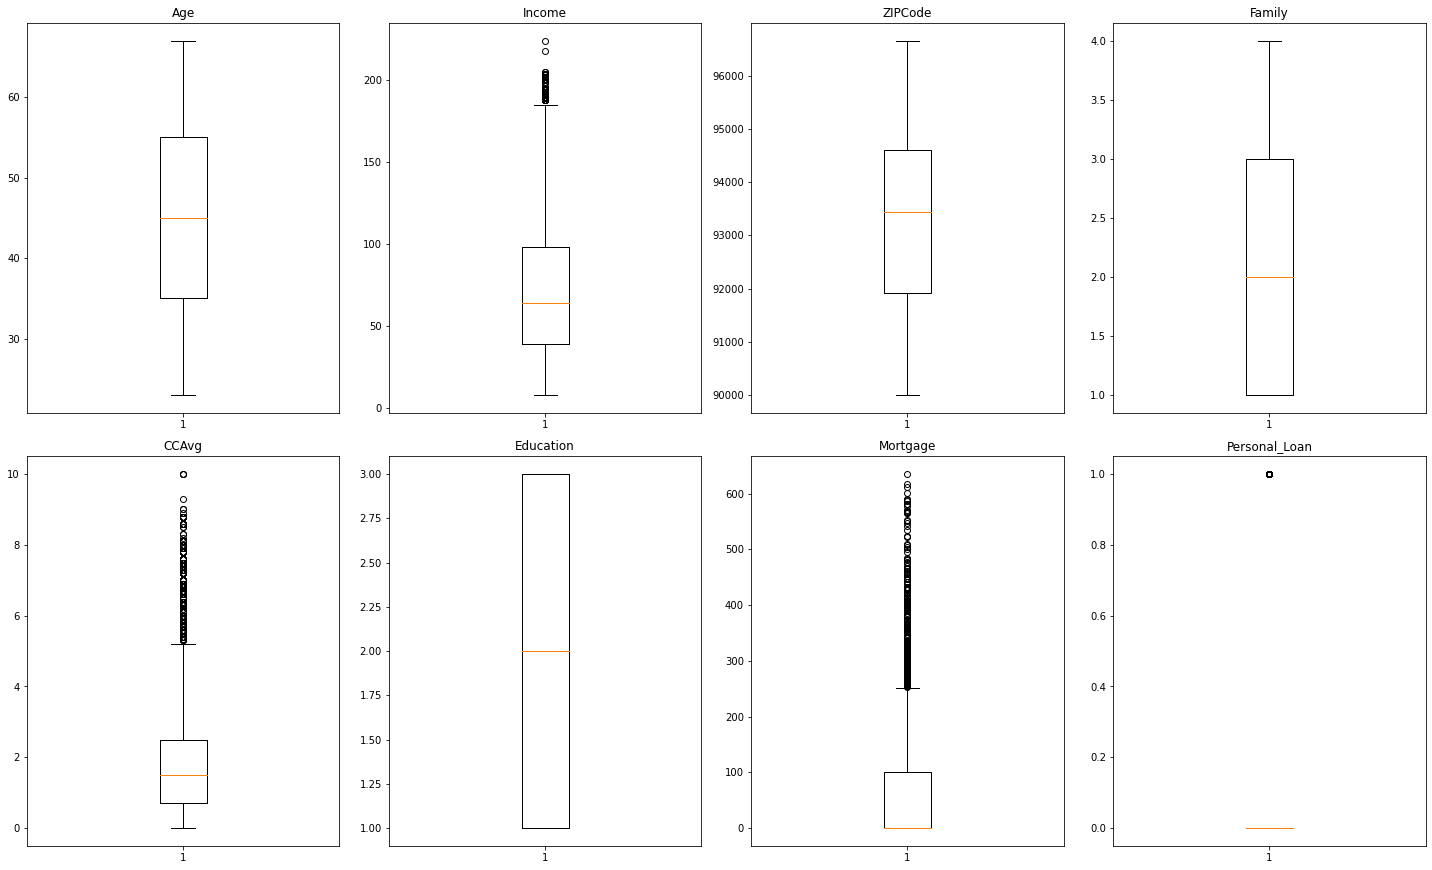

<IPython.core.display.Javascript object>

In [160]:
numerical_col = loan_lg.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan_lg[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Income, CCAvg & Mortgage, have upper outliers. 

<h3 style="color:Blue">Treating Outliers</h3>

Since Outlier Treatment negatively affected target variables by removing 1's and caused solver="newton-cg" throw below error:  `ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0`

Therefore Outlier Treatment was deemed as an adverse affective and not done


In [161]:
# # functions to treat outliers by flooring and capping


# def treat_outliers(loan_lg, col):
#     """
#     Treats outliers in a variable

#     df: dataframe
#     col: dataframe column
#     """
#     Q1 = loan_lg[col].quantile(0.25)  # 25th quantile
#     Q3 = loan_lg[col].quantile(0.75)  # 75th quantile
#     IQR = Q3 - Q1
#     Lower_Whisker = Q1 - 1.5 * IQR
#     Upper_Whisker = Q3 + 1.5 * IQR

#     # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
#     # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
#     loan_lg[col] = np.clip(loan_lg[col], 0, Upper_Whisker)

#     return loan_lg


# def treat_outliers_all(loan_lg, col_list):
#     """
#     Treat outliers in a list of variables

#     df: dataframe
#     col_list: list of dataframe columns
#     """
#     for c in col_list:
#         loan_lg = treat_outliers(loan_lg, c)

#     return loan_lg

<IPython.core.display.Javascript object>

In [162]:
# # numerical_col = loan_lg.select_dtypes(include=np.number).columns.tolist()
# numerial_col = ["Income", "CCAvg", "Mortgage"]
# data = treat_outliers_all(loan_lg, numerical_col)
# # let's look at box plot to see if outliers have been treated or not
# plt.figure(figsize=(20, 30))

# for i, variable in enumerate(numerical_col):
#     plt.subplot(5, 4, i + 1)
#     plt.boxplot(data[variable], whis=1.5)
#     plt.tight_layout()
#     plt.title(variable)

# plt.show()

<IPython.core.display.Javascript object>

* Outliers are gone

### Data Preparation: 
Not needed since Personal_Loan is alreadu defined as Binary Class (no need for one-hot encoding)

In [163]:
# To check after Outlier Treatment, 1's will return 0. Since outlier treatment is disabled we are just returning
# anyways to make sure
print("Count of 1's: ", loan_lg[loan_lg["Personal_Loan"] == 1].value_counts().sum())
print("Count of 0's: ", loan_lg[loan_lg["Personal_Loan"] == 0].value_counts().sum())

Count of 1's:  480
Count of 0's:  4520


<IPython.core.display.Javascript object>

<h3 style="color:Blue">Data Split for Logistic Regression</h3>

In [164]:
#Defining Dependent and Independent Variables
X = loan_lg.drop(["Personal_Loan"], axis=1)
Y = loan_lg["Personal_Loan"]
# X = pd.get_dummies(X, drop_first=True)
# Splitting Data in Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1, stratify=Y)



<IPython.core.display.Javascript object>

In [165]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 7)
Shape of test set :  (1500, 7)
Percentage of classes in training set:
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

<h2 style="color:Blue">Logistic Regression Model Building</h2>

### Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting a liability customer `will buy` a personal loan but in `reality` the liability customer `will NOT Buy` Personal Loan. - Loss of resources

2. Predicting a liability customer `will NOT buy` a personal loan but in `reality` the liability customer `will Buy` Personal Loan. - Loss of opportunity

#### Which case is more important? 
* Both the cases are important as:

1. Predicting a liability customer `will buy` a personal loan but in `reality` the liability customer `will NOT Buy` Personal Loan - means that we will end targeting wrong customer group. - Loss of resources

2. Predicting a liability customer `will NOT buy` a personal loan but in `reality` the liability customer `will Buy` Personal Loan - means we will end up losing out on an oppurtnitiy of targeting the just the customer we need. - Loss of opportunity

#### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [166]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [167]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression

In [168]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [169]:
pred_prob = model.predict_proba(X_train)[:, 1]
pred_thres = pred_prob > 0.5
y_pred = np.round(pred_thres)
cm = confusion_matrix(y_train, y_pred)
cm.flatten()

array([3113,   51,  134,  202])

<IPython.core.display.Javascript object>

In [170]:
for item in cm.flatten():
    print("{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum()))

3113
88.94%
51
1.46%
134
3.83%
202
5.77%


<IPython.core.display.Javascript object>

<h3 style="color:Red">Logistic Regression - Checking performance on training set</h3>

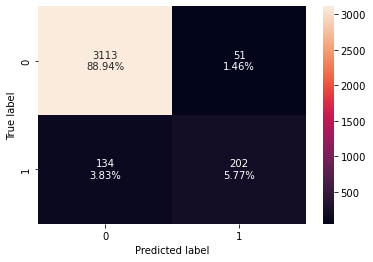

<IPython.core.display.Javascript object>

In [171]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [172]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.947143,0.60119,0.798419,0.685908


<IPython.core.display.Javascript object>

<h3 style="color:Red">Logistic Regression - Checking performance on testing set</h3>

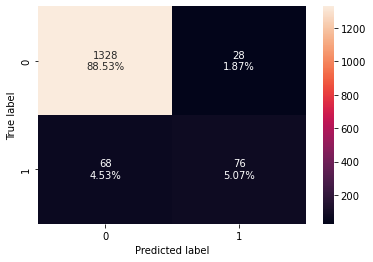

<IPython.core.display.Javascript object>

In [173]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [174]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.936,0.527778,0.730769,0.612903


<IPython.core.display.Javascript object>

#### ROC-AUC

* The area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at distinguishing between classes.


<h3 style="color:DarkBlue">Logistic Regression - ROC-AUC on training set set</h3>

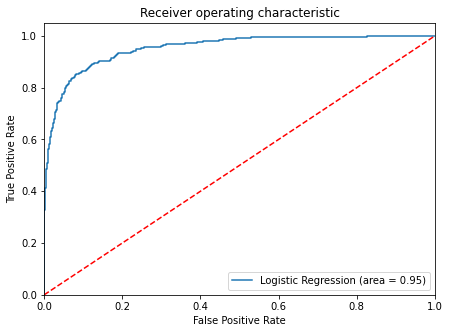

<IPython.core.display.Javascript object>

In [175]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Area under the curve is large which is good

<h3 style="color:DarkBlue">Logistic Regression - ROC-AUC on testing set set</h3>

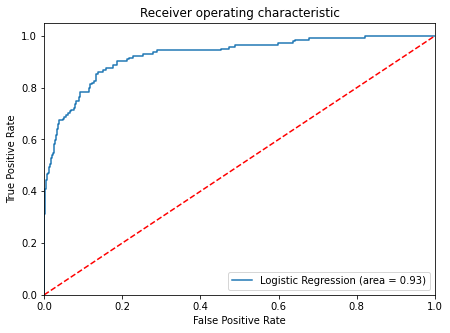

<IPython.core.display.Javascript object>

In [176]:
# Find the roc auc score for training data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Area under the curve is large which is good
* Model is giving a generalized performance.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

Optimal thresold is the value that best separated the True positive rate and False positive rate. 

In [177]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.12970994707395936


<IPython.core.display.Javascript object>

<h3 style="color:Red">Logistic Regression - Checking optimal_threshold_auc_roc=0.07454074849460511 on performance on training set</h3>

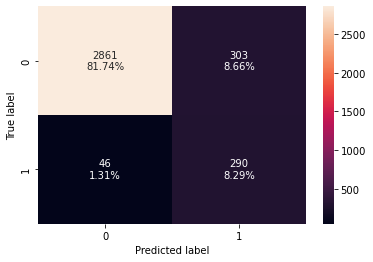

<IPython.core.display.Javascript object>

In [178]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [179]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.900286,0.863095,0.489039,0.624327


<IPython.core.display.Javascript object>

<h3 style="color:Red">Logistic Regression - Checking optimal_threshold_auc_roc=0.07454074849460511 on performance on testing set</h3>

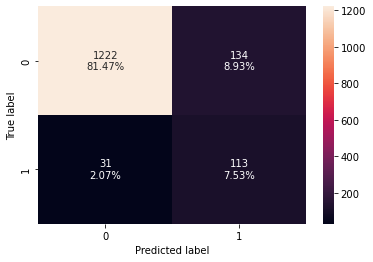

<IPython.core.display.Javascript object>

In [180]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [181]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.89,0.784722,0.45749,0.578005


<IPython.core.display.Javascript object>

* `F1 Score` & `Precision` has decreased where as Recall has increased
* Let's find a better threshold to improve our model

#### Let's use Precision-Recall curve and see if we can find a better threshold

The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement. 

#### precision_recall_curve()

Returns the fpr, tpr and threshold values

**Input:** 
        1. Original data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

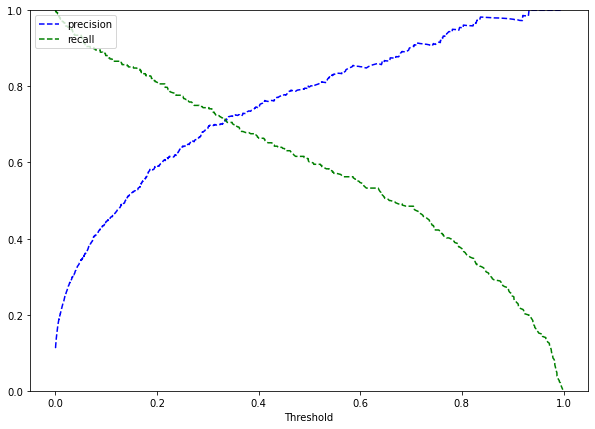

<IPython.core.display.Javascript object>

In [182]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.3, we get balanced recall and precision.

In [183]:
# setting the threshold
optimal_threshold_curve = 0.30

<IPython.core.display.Javascript object>

<h3 style="color:DarkBlue">Logistic Regression - Precision-Recall = 0.3 training set set</h3>

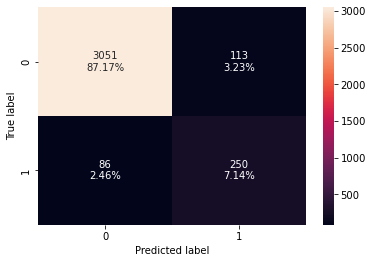

<IPython.core.display.Javascript object>

In [184]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [185]:
log_reg_model_train_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_curve
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.943143,0.744048,0.688705,0.715308


<IPython.core.display.Javascript object>

<h3 style="color:DarkBlue">Logistic Regression - Precision-Recall = 0.3 testing set set</h3>

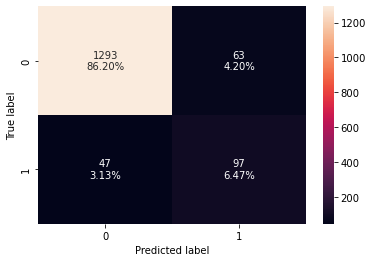

<IPython.core.display.Javascript object>

In [186]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [187]:
log_reg_model_test_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_curve
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.926667,0.673611,0.60625,0.638158


<IPython.core.display.Javascript object>

* Model is performing well on training and test.
* There's more improvement interms of Recall and F1 Score however still not as good as the original

### Model Performance Summary

In [188]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.074 Threshold",
    "Logistic Regression-0.30 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.074 Threshold,Logistic Regression-0.30 Threshold
Accuracy,0.947143,0.900286,0.943143
Recall,0.601190,0.863095,0.744048
Precision,0.798419,0.489039,0.688705
F1,0.685908,0.624327,0.715308


<IPython.core.display.Javascript object>

In [189]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.074 Threshold",
    "Logistic Regression-0.30 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.074 Threshold,Logistic Regression-0.30 Threshold
Accuracy,0.936000,0.890000,0.926667
Recall,0.527778,0.784722,0.673611
Precision,0.730769,0.457490,0.606250
F1,0.612903,0.578005,0.638158


<IPython.core.display.Javascript object>